Для примера работы с API мы будем получать данные для статистических отчетов произвольной группы, например:

* соотношение мужчин и женщин в группе;
* статистика географии пользователей;
* другие данные для аналитики групп конкурентов.

https://drive.google.com/file/d/1Y7uvebwy64KTlyoNW81mzfBuvEneWA59/view?usp=sharing

# План вебинара
1. Создание приложения вконтакте
2. Получение токена
3. Создание файла с токеном
4. Получение данных по группам

Об ограничениях

https://vk.com/dev/api_requests?f=3.%20%D0%9E%D0%B3%D1%80%D0%B0%D0%BD%D0%B8%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B8%20%D1%80%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%86%D0%B8%D0%B8

## Использование API веб-приложений

API веб-приложения представляет собой часть веб-сайта, предназначенную для взаимодействия с программами, которые используют особым образом построенные URL-адреса для запроса информации. Подобные запросы называются вызовами API. Запрашиваемые данные возвращаются в удобном формате (например, JSON или CSV). Многие приложения, зависящие от внешних источников данных (как приложения, интегрирующиеся с сайтами социальных сетей), используют вызовы API.

**API** расшифровывается как **Application Programming Interface**, или интерфейс для программирования приложений.

**API ВКонтакте** — это интерфейс, который позволяет получать информацию из базы данных vk.com с помощью http-запросов к специальному серверу. Вам не нужно знать в подробностях, как устроена база, из каких таблиц и полей каких типов она состоит — достаточно того, что API-запрос об этом «знает». Синтаксис запросов и тип возвращаемых ими данных строго определены на стороне самого сервиса.

**Методы** https://vk.com/dev.php?method=first_guide

**Версии** 
https://vk.com/dev/versions


**Токены** — это ключи доступа к API. Они используются для авторизации при запросах к API.

1) Выбираем "Мои приложения"

2) Нажимаем кнопку "Создать приложение"

3) Создайте Standalone приложение.
![image.png](https://sun9-64.userapi.com/c854020/v854020675/216c0a/wxdS4WCSFsI.jpg)

4) В настройках включить Open API

5) В поле *адрес сайта* вводите http://localhost

6) В поле базовый домен вводите localhost
![image.png](https://sun9-60.userapi.com/c205824/v205824523/c9867/YXDk8Mzdp94.jpg)

7) Скопируйте id приложения в ссылку https://oauth.vk.com/authorize?client_id=1&display=page&scope=stats,offline&response_type=token&v=5.103&state=123456

8) Нажимаем разрешить

9) Сохраняем токен
![image.png](https://sun9-29.userapi.com/c857736/v857736671/14acf8/2c-F9g7w0jA.jpg)

In [1]:
#Получение информации о токене их сохраненного файла
with open('token.txt', 'r') as file_object:
    token = file_object.read().strip()

Адрес, по которому мы обращались, возвращает результат в json формате.

JSON (JavaScript Object Notation) - простой формат обмена данными, удобный для чтения и написания как человеком, так и компьютером.

JSON основан на двух структурах данных:

1) Коллекция пар ключ/значение. В разных языках, эта концепция реализована как объект, запись, структура, словарь, хэш, именованный список или ассоциативный массив.

2) Упорядоченный список значений. В большинстве языков это реализовано как массив, вектор, список или последовательность.

In [2]:
import requests
#Получаем информацию по id 
#GET-запрос к API ВКонтакте
r = requests.get('https://api.vk.com/method/users.get?user_id=789896',  
                 params = {'access_token':token, 'fields': 'education,sex', 'v':'5.52'})
response = r.json()
response

{'response': [{'id': 789896,
   'first_name': 'Anna',
   'last_name': 'Jata',
   'sex': 1}]}

Мы получили строку в формате JSON. Её можно преобразовать в словарь методом json и после этого обращаться к различным полям. Кроме того, такие большие вложенные словари нагляднее выводить с помощью функции pprint (~pretty print, красивый вывод), которым мы и воспользуемся

## JSON

JSON - текстовый формат данных, следующий за синтаксисом объекта JavaScript, который был популяризирован Дугласом Крокфордом. Несмотря на то, что он очень похож на буквенный синтаксис объекта JavaScript, его можно использовать независимо от JavaScript, и многие среды программирования имеют возможность читать (анализировать) и генерировать JSON.

При работе с модулем requests в нашем репертуаре имеется метод json(), который преобразует объект response в объект класса dict. 

Подробнее: https://python-scripts.com/json

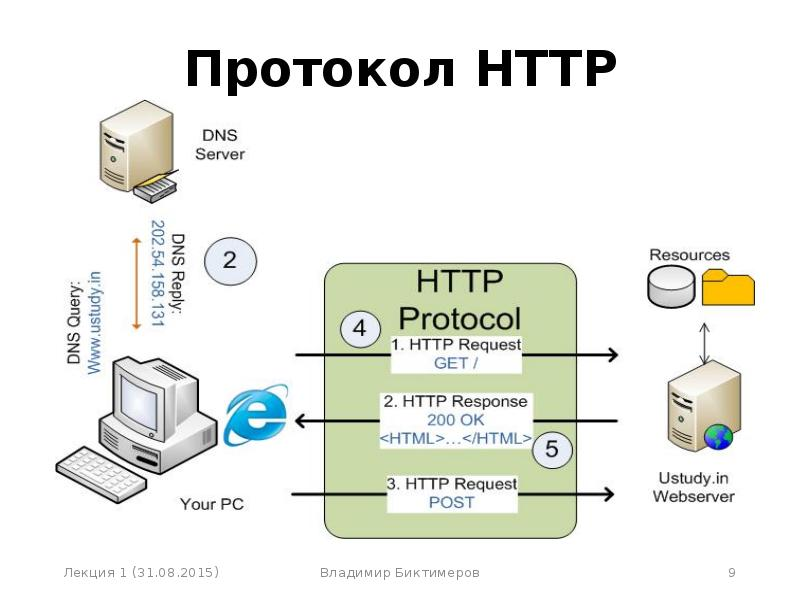

### Методы запросов

HTTP методы

Для того, чтобы указать серверу на то, какое действие мы хотим произвести с ресурсом, используется тип HTTP-запроса, который также называется HTTP метод. Существует несколько HTTP методов, которые описывают действия с ресурсами. Наиболее часто используемыми являются GET и POST. 

### GET — получение ресурса

Метод GET запрашивает информацию из указанного источника и не влияет на его содержимое. Запрос доступен для кеширования данных и добавления в закладки. Длина запроса ограничена (макс. длина URL - 2048).

Примечание: Строка запроса (имя/значение) отправляется в URL 

``/login-check.php?argument1=value1&argument2=value2``

### POST — создание ресурса

Метод POST используется для отправки данных, что может оказывать влияние на содержимое ресурса. В отличие от метода GET запросы POST не могут быть кешированы, они не остаются в истории браузера и их нельзя добавить в закладки. Запросы POST не ограничиваются в объеме.

Примечание: Отправляемые данные содержатся в теле запроса. 

https://developer.mozilla.org/ru/docs/Web/HTTP/Methods

## Создадим небольшое приложение

In [29]:
from tkinter import *
from tkinter import messagebox
 
def show_message():
    idv = message.get()
    link = 'https://api.vk.com/method/users.get?user_id='+idv
    r = requests.get(link,  
                 params = {'access_token':token, 'fields': 'education,universities,sex', 'v':'5.52'})

    response = r.json()
    messagebox.showinfo("API", response['response'])

root = Tk()
root.title("API")
root.geometry("200x150")
 
message = StringVar()
 
message_entry = Entry(textvariable=message)
message_entry.place(relx=.5, rely=.1, anchor="c")
 
message_button = Button(text="Click Me", command=show_message)
message_button.place(relx=.5, rely=.5, anchor="c")
 
root.mainloop()

In [31]:
#pprint
from pprint import pprint
pprint(response)

{'response': [{'first_name': 'Anna',
               'id': 789896,
               'last_name': 'Jata',
               'sex': 1}]}


## Работа с поисковым запросом

https://vk.com/dev/groups.search

In [3]:
def search_query():

    #Параметры sort
    #0 — сортировать по умолчанию (аналогично результатам поиска в полной версии сайта);
    #1 — сортировать по скорости роста;
    #2 — сортировать по отношению дневной посещаемости к количеству пользователей;
    #3 — сортировать по отношению количества лайков к количеству пользователей;
    #4 — сортировать по отношению количества комментариев к количеству пользователей;
    #5 — сортировать по отношению количества записей в обсуждениях к количеству пользователей.
    
    query = input('Введите поисковый запрос: ')
    req = requests.get('https://api.vk.com/method/groups.search', 
            params = {'access_token':token, 
                      'v':'5.110', 'q':str(query), 'count':10, 'sort':0}).json()['response']
    groups = [req['items'][i]['id'] for i in range(len(req['items']))]
    return groups
result = search_query()



Введите поисковый запрос: Программиирование


In [4]:
#Выведем полученное значение
result

[4425716]

In [45]:
string = 'f gk d g'.split()
' '.join(string)

'f gk d g'

In [6]:
#Преобразуем в строку

In [72]:

obj = ', '.join((str(x) for x in result[:5]))
#Задайте запрос для нескольких групп в строке obj
req = requests.get('https://api.vk.com/method/groups.getById', 
            params = {'access_token':token, 'v': '5.52', 'fields': 'members_count,activity', 'group_ids': obj}) 

In [60]:
req.json()

{'response': [{'id': 79831840,
   'name': 'Программирование',
   'screen_name': 'bookflow',
   'is_closed': 0,
   'type': 'page',
   'members_count': 110328,
   'activity': 'Программирование',
   'photo_50': 'https://sun1-30.userapi.com/impf/c846520/v846520871/6cb2e/ve1cqPZF5y4.jpg?size=50x0&quality=88&crop=0,0,512,512&sign=c86025b89fab755c9355a3bb8be6ab96&c_uniq_tag=JqWFDh5Tfo3eNWO5msxCEpjT1aAYP5HuPYxyOZQisYY&ava=1',
   'photo_100': 'https://sun1-30.userapi.com/impf/c846520/v846520871/6cb2e/ve1cqPZF5y4.jpg?size=100x0&quality=88&crop=0,0,512,512&sign=f25197d711f9ca2122cafc0619282557&c_uniq_tag=V8ey0-DJaGoGH7YIEXX3xt-GSXUmJxvV8gh4vtuFsgg&ava=1',
   'photo_200': 'https://sun1-30.userapi.com/impf/c846520/v846520871/6cb2e/ve1cqPZF5y4.jpg?size=200x0&quality=88&crop=0,0,512,512&sign=565b174686991fcf1c22e768846668e0&c_uniq_tag=rDTqAYrPhaCBYAuOwgfOeSQHqdFEw7U8b6M8_FNc_gk&ava=1'},
  {'id': 6905578,
   'name': 'Программирование',
   'screen_name': 'null_bytes',
   'is_closed': 0,
   'type': 'gro

In [73]:
response = req.json()['response']

def get_info(elem):
    
    groupId = elem['id']
    
    name = elem['name']
    members_count = elem['members_count']
    activity = elem['activity']
    return (groupId, name, members_count, activity)

test = list(map(get_info, response))
test

[(79831840, 'Программирование', 110328, 'Программирование'),
 (6905578, 'Программирование', 6400, 'Открытая группа'),
 (16108331, 'Программирование ITmozg:', 245220, 'Программирование'),
 (40429688, 'Программирование', 12176, 'Открытая группа'),
 (159224823, 'CODE BLOG | Программирование', 56784, 'Программирование')]

In [74]:
import pandas as pd
#Сформируем датафрейм
date = pd.DataFrame(test, columns=['id', 'name', 'members_count', 'activity'])
date

,id,name,members_count,activity
0,79831840,Программирование,110328,Программирование
1,6905578,Программирование,6400,Открытая группа
2,16108331,Программирование ITmozg:,245220,Программирование
3,40429688,Программирование,12176,Открытая группа
4,159224823,CODE BLOG | Программирование,56784,Программирование


## Достанем пользователей групп

In [75]:
req = requests.get('https://api.vk.com/method/groups.getMembers',
                   params = {'access_token':token, 'fields': 'education,city,sex', 'v':'5.52', 'group_id': 16108331})
                   
req.json()['response']

{'count': 245220,
 'items': [{'id': 10,
   'first_name': 'Александр',
   'last_name': 'Кузнецов',
   'sex': 2,
   'city': {'id': 2, 'title': 'Санкт-Петербург'}},
  {'id': 17,
   'first_name': 'Александр',
   'last_name': 'Беспалов',
   'sex': 2,
   'city': {'id': 2, 'title': 'Санкт-Петербург'}},
  {'id': 134,
   'first_name': 'Илико',
   'last_name': 'Шаптай',
   'sex': 2,
   'city': {'id': 2, 'title': 'Санкт-Петербург'}},
  {'id': 154,
   'first_name': 'Елисей',
   'last_name': 'Замахов',
   'sex': 2,
   'city': {'id': 6823, 'title': 'Łódź'}},
  {'id': 179,
   'first_name': 'Алексей',
   'last_name': 'Егоров',
   'sex': 2,
   'city': {'id': 5094472, 'title': 'San Jose'}},
  {'id': 186,
   'first_name': 'Ольга',
   'last_name': 'Савинкина-Титова',
   'sex': 1,
   'city': {'id': 146, 'title': 'Тула'}},
  {'id': 274,
   'first_name': 'Мария',
   'last_name': 'Тюрина',
   'sex': 1,
   'city': {'id': 2202278, 'title': 'Kraków'},
   'university': 1,
   'university_name': 'СПбГУ',
   'facult

In [68]:
len(req.json()['response']['items'])

1000

## Получаем всех

Применим цикл, чтобы получить все данные

Для этого нам нужны поля **count** и **offset**

offset - смещение, необходимое для выборки определенного подмножества участников. По умолчанию 0. 

In [18]:
step = 1000 #объявляем переменную шага и задаем ей значение 1000. Это нужно на случай, если придется уменьшить количество запросов

#отправляем первый запрос к api, чтобы узнать длину массива данных
req = requests.get('https://api.vk.com/method/groups.getMembers', 
        params = {'access_token':token, 
                  'v':'5.52', 'fields': 'sex, bdate, city', 'group_id': 16108331})

count = req.json()['response']['count']
print(count)

245220


In [80]:
list_1 = [1,2,3]
list_1.extend([1,2])
list_1

[1, 2, 3, 1, 2]

In [21]:

items = []

for offset in range(0, 2000, step):
    req = requests.get('https://api.vk.com/method/groups.getMembers', 
        params = {'access_token':token, 
                  'v':'5.52', 'fields': 'sex, bdate,city', 
                  'count': step, 'offset': offset, 'group_id': 16108331})
    items.extend(req.json()['response']['items'])


In [22]:
#Красивый вывод
items

[{'id': 10,
  'first_name': 'Александр',
  'last_name': 'Кузнецов',
  'sex': 2,
  'city': {'id': 2, 'title': 'Санкт-Петербург'}},
 {'id': 17,
  'first_name': 'Александр',
  'last_name': 'Беспалов',
  'sex': 2,
  'bdate': '21.10.1982',
  'city': {'id': 2, 'title': 'Санкт-Петербург'}},
 {'id': 134,
  'first_name': 'Илико',
  'last_name': 'Шаптай',
  'sex': 2,
  'bdate': '20.8',
  'city': {'id': 2, 'title': 'Санкт-Петербург'}},
 {'id': 154,
  'first_name': 'Елисей',
  'last_name': 'Замахов',
  'sex': 2,
  'bdate': '10.8',
  'city': {'id': 6823, 'title': 'Łódź'}},
 {'id': 179,
  'first_name': 'Алексей',
  'last_name': 'Егоров',
  'sex': 2,
  'city': {'id': 5094472, 'title': 'San Jose'}},
 {'id': 186,
  'first_name': 'Ольга',
  'last_name': 'Савинкина-Титова',
  'sex': 1,
  'bdate': '17.6',
  'city': {'id': 146, 'title': 'Тула'}},
 {'id': 274,
  'first_name': 'Мария',
  'last_name': 'Тюрина',
  'sex': 1,
  'city': {'id': 2202278, 'title': 'Kraków'}},
 {'id': 341,
  'first_name': 'Shmavon',


In [8]:
#Найдем количество

In [23]:
#Определим функцию, которая позволит найти города
def get_title(elem):
    try:
        title = elem['city']['title']
    except:
        title = None
    return title

In [24]:
#Создадим список
list(map(get_title, items))

['Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Łódź',
 'San Jose',
 'Тула',
 'Kraków',
 'Москва',
 None,
 'Санкт-Петербург',
 'Москва',
 'Санкт-Петербург',
 None,
 None,
 'Roma',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 None,
 None,
 'Санкт-Петербург',
 'Phuket',
 'Санкт-Петербург',
 'Москва',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 None,
 'Санкт-Петербург',
 'Москва',
 'Санкт-Петербург',
 'Berlin',
 'Санкт-Петербург',
 None,
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Berlin',
 None,
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 None,
 'Москва',
 'Москва',
 'Санкт-Петербург',
 None,
 'Москва',
 'Санкт-Петербург',
 None,
 None,
 'Москва',
 'Москва',
 'Санкт-Петербург',
 None,
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Москва',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербу

In [39]:
#Зададим датафрейм, добавим к информации столбец городов
import pandas as pd
df = pd.DataFrame.from_records(items)

In [28]:
df

,id,first_name,last_name,sex,city,bdate,deactivated
0,10,Александр,Кузнецов,2,Санкт-Петербург,NaN,NaN
1,17,Александр,Беспалов,2,Санкт-Петербург,21.10.1982,NaN
2,134,Илико,Шаптай,2,Санкт-Петербург,20.8,NaN
3,154,Елисей,Замахов,2,Łódź,10.8,NaN
4,179,Алексей,Егоров,2,San Jose,NaN,NaN
...,...,...,...,...,...,...,...
1995,359413,Анна,Чугункова,1,Copenhagen,13.4.1989,NaN
1996,359564,Денис,Лазарев,2,Волхов,NaN,NaN
1997,359679,Антон,Иванов,2,Санкт-Петербург,19.3.1988,NaN
1998,360119,Наталья,Серганова,1,Воронеж,27.8.1988,NaN


In [40]:
df['city'] = list(map(get_title, items))

In [11]:
#Информация

In [41]:
df = df.groupby(['city']).size().reset_index(name='count')
df.sample(10)

,city,count
23,Karlsruhe,1
72,Волгоград,2
140,Сосновый Бор,1
15,Copenhagen,1
45,Seattle,2
115,Новомосковск,1
65,Балашиха,1
150,Тюмень,1
18,Dublin,2
84,Железнодорожный (Балашиха),1


In [42]:

df_sorted = df.sort_values('count', ascending=False)  
df_sorted

,city,count
132,Санкт-Петербург,1061
107,Москва,258
117,Новосибирск,14
7,Berlin,7
113,Нижний Новгород,7
...,...,...
84,Железнодорожный (Балашиха),1
1,Afula,1
38,Puttaparthi,1
81,Донецк,1


##  Получение постов

In [ ]:
req = requests.get('https://api.vk.com/method/wall.get', 
        params = {'owner_id': -42565717, 'access_token':token, 
                  'v':'5.73', 'fields': 'likes', 'group_id': 42565717})

req.json()['response']['items'][10]

In [ ]:
from time import sleep


def get_members(owner_id):
    items = []
    from collections import defaultdict
    s = defaultdict(list)
    r = requests.post('https://api.vk.com/method/execute.newFunc?group_id='+
                      str(owner_id)+'&offset='+str(0)+'&v='+'5.73'+'&count='+str(5000)
                      +'&access_token='+token).json()['response']
    print(r[0])

    members_count = r[0] #количество участников
    print('В сообществе', owner_id, 'участников :',members_count)
    items.extend(r[1])
    
    if members_count>5000:
        for offset in range(5000, members_count, 5000):
            try:
#                 count = offset + 5000
                count = 5000
                r = requests.post('https://api.vk.com/method/execute.newFunc?group_id='+
                                 str(owner_id)+'&offset='+str(offset)+'&v='+'5.73'+'&count='+
                                 str(count)+'&access_token='+token).json()['response']
                items.extend(r[1])
                sleep(1)
            except Exception as e:
                print(str(e))
            
    return items

both = list(map(get_members, ['42565717', '3183750']))

## Хранимые процедуры


Позволяют многократно увеличивать количество запросов, которые можно отправить к API VK

https://vk.com/dev/execute

https://vk.com/faq4155

код алгоритма в VKScript - формате, похожем на JavaSсript или ActionScript (предполагается совместимость с ECMAScript). Алгоритм должен завершаться командой return %выражение%. Операторы должны быть разделены точкой с запятой. 

Позволяет создавать значительно более мощные программы, засчет возможности использования нескольких методов одновременно при многократном увеличении выдаваемого сервером объема данных. 

<code>
var members = API.groups.getMembers(
{"group_id":(Args.group_id),
"count":"1000",
"offset":(parseInt(Args.offset)),
"v":"5.53"});
var members_cnt = members.count;
members = members.items;
var offset_members = parseInt(Args.offset) + 1000;
while(offset_members < parseInt(Args.count))
    {members = members + API.groups.getMembers(
        {"group_id":(Args.group_id),
        "offset":(offset_members),
        "count":"1000",
        "v":"5.53"}
    ).items;
offset_members = offset_members + 1000;};

return[members_cnt, members];
</code>

In [ ]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

print(len(intersection(both[0], both[1])))

## Библиотеки для работы с API  Vk

https://vk-api.readthedocs.io/en/latest/

# GitHub

API https://api.github.com/search/repositories?q=language:python&sort=stars

In [ ]:
# Обработка ответа api
import requests
# Создание вызова API и сохранение ответа.
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
r = requests.get(url)
print("Status code:", r.status_code)
# Сохранение ответа API в переменной.
response_dict = r.json()
# Обработка результатов.
print(response_dict.keys())

In [ ]:
# Анализ информации о репозиториях.
repo_dicts = response_dict['items']
print("Repositories returned:", len(repo_dicts))
# Анализ первого репозитория.
repo_dict = repo_dicts[0]
print("\nKeys:", len(repo_dict))
for key in sorted(repo_dict.keys()):
    print(key)

In [ ]:
repo_dict = repo_dicts[0]
print("\nSelected information about first repository:")
print('Name:', repo_dict['name'])
print('Owner:', repo_dict['owner']['login'])
print('Stars:', repo_dict['stargazers_count'])
print('Repository:', repo_dict['html_url'])
print('Created:', repo_dict['created_at'])
print('Updated:', repo_dict['updated_at'])
print('Description:', repo_dict['description'])